# Libraries Utilized

In [77]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import ast

# Helper Functions

In [94]:
# Function to load data
def load_data():
    
    features = pd.read_csv('C:\\Users\\willi\\OneDrive\\Documents\\FinalProject\\fma_metadata\\features-Ryan.csv')
    tracks = pd.read_csv('C:\\Users\\willi\\OneDrive\\Documents\\FinalProject\\fma_metadata\\tracks.csv')
    genres = pd.read_csv('C:\\Users\\willi\\OneDrive\\Documents\\FinalProject\\fma_metadata\\genres.csv')
    return features, tracks, genres

import seaborn as sns

def eda(features):
    # Assuming 'features' is your DataFrame
    sns.set(style="whitegrid")

    # Set the number of subplots per row (you can adjust this)
    subplots_per_row = 4

    # Calculate the number of rows needed for subplots
    num_features = len(features.columns)
    num_rows = (num_features // subplots_per_row) + (num_features % subplots_per_row > 0)

    # Create subplots
    fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 3 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    # Flatten the axes array to iterate over all subplots
    axes = axes.flatten()

    # Iterate over columns and create histograms
    for i, column in enumerate(features.columns):
        ax = axes[i]
        sns.histplot(features[column], ax=ax, color='skyblue', bins=20, kde=True)
        ax.set_title(column)
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')

    # Remove empty subplots if needed
    if num_features % subplots_per_row != 0:
        for i in range(num_features % subplots_per_row, subplots_per_row):
            fig.delaxes(axes[-i - 1])

    plt.show()

# Function to create bar plot
def show_genre_distribution(data):
    # Create a bar plot for the number of tracks per title
    plt.figure(figsize=(15,6))
    plt.bar(data['title'], data['#tracks'])

    # Add labels and title
    plt.xlabel('Title')
    plt.ylabel('Number of Tracks')
    plt.title('Number of Tracks per Title')

    # Rotate x-axis labels for better visibility (optional)
    plt.xticks(rotation=90, ha='right')

    # Show the plot
    plt.show()

def show_popular_genres(data):
    # Filter rows where #tracks is greater than 5000
    filtered_df = data[data['#tracks'] > 5000]

    # Set a larger figure size
    plt.figure(figsize=(10, 6))

    # Create a scatter plot for the number of tracks per title
    plt.bar(filtered_df['title'], filtered_df['#tracks'])

    # Add labels and title
    plt.xlabel('Genre Category')
    plt.ylabel('Number of Tracks')
    plt.title('Genres with > 5000 samples')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

def show_toplevel_genres(data):
    # Group by 'top_level' and sum '#tracks'
    grouped_df = data.groupby('top_level')['#tracks'].sum().reset_index()

    # Get the titles for the x-axis labels based on the 'top_level' values
    x_labels = data.groupby('top_level')['title'].first().reset_index()['title']

    # Plotting with plt.bar
    plt.figure(figsize=(10, 6))
    plt.bar(x=range(len(grouped_df)), height=grouped_df['#tracks'], tick_label=x_labels)
    plt.title('Distribution of #tracks Among Top Level Groups')
    plt.xlabel('Top Level Group')
    plt.ylabel('Total #tracks')
    plt.xticks(rotation=45, ha='right')

    plt.show()

def scale_and_sample(features, sample_percentage=0.2, random_seed=42):
    # Take a random 20% sample
    sampled_features = features.sample(frac=sample_percentage, random_state=random_seed)

    # Extract the 'track_id' column before scaling
    track_ids = sampled_features['track_id']
    sampled_features = sampled_features.drop(columns=['track_id'])

    # Check for missing values in the sample
    missing_values = sampled_features.isnull().sum()
    if missing_values.sum() > 0:
        print("Warning: Missing values found in the sampled features:")
        print(missing_values)
        return None

    # Check for NaN values in the sample
    nan_values = sampled_features.isna().sum()
    if nan_values.sum() > 0:
        print("Warning: NaN values found in the sampled features:")
        print(nan_values)
        return None

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(sampled_features)

    # Create a new DataFrame with scaled features and 'track_id' column
    scaled_features_df = pd.DataFrame(data=scaled_features, columns=sampled_features.columns)
    scaled_features_df['track_id'] = track_ids.reset_index(drop=True)

    return scaled_features_df

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

def apply_visualize_pca(features, n_components, title, column_names=None):
    
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features)
    
    # Print the principal components
    if column_names is not None:
        print(f"Principal Component 1 (associated with {column_names[0]}): {pca.components_[0]}")
        print(f"Principal Component 2 (associated with {column_names[1]}): {pca.components_[1]}")
    
    # Scatter plot
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    return pca_result

def apply_visualize_tsne(features, n_component, title):
    n_components=2
    # Apply TSNE
    tsne = TSNE(n_components=n_components, random_state=42)
    tsne_result = tsne.fit_transform(features)
    
    # Visualize
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()
    return tsne_result

def apply_visualize_umap(features, n_components, title):
    n_components=2
    umap = UMAP(n_components=n_components, random_state=42)
    umap_result = umap.fit_transform(features)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.show()
    return umap_result

# Function for clustering and visualization
def apply_visualize_kmeans(data, n_clusters, n_init=15, dataframe_name=""):
    """
    Apply k-means clustering to the input data and visualize the clusters in a scatter plot.

    Parameters:
    - data (numpy.ndarray): Input data for clustering.
    - n_clusters (int): Number of clusters.
    - n_init (int, optional): Number of times the k-means algorithm will be run with different centroid seeds.
    - dataframe_name (str, optional): Name of the DataFrame.

    Returns:
    - numpy.ndarray: Cluster labels assigned by k-means.
    """

    # Create a k-means instance with explicit n_init setting
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
    
    # Fit the model and predict cluster labels
    clusters = kmeans.fit_predict(data)

    # Create a scatter plot with points colored by cluster
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.title(f'KMeans Using {dataframe_name} and {n_clusters} Clusters')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Display the plot
    plt.show()

    return clusters


from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

def grid_search_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = {}

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(data)

            # Check if there is only one unique label
            unique_labels = np.unique(clusters)
            if len(unique_labels) == 1:
                continue  # Skip silhouette score computation

            silhouette_avg = silhouette_score(data, clusters)

            # Update best parameters if a higher silhouette score is achieved
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'eps': eps, 'min_samples': min_samples}

    return best_params, best_score

def visualize_dbscan_results(data, best_params):
    if not best_params:
        print("No valid clusters found.")
        return

    if isinstance(best_params, np.float32):
        print("Unexpected type for best_params. Expected a dictionary.")
        return

    eps = best_params.get('eps')  # Use get method to handle missing key gracefully
    min_samples = best_params.get('min_samples')

    if eps is None or min_samples is None:
        print("Missing 'eps' or 'min_samples' in best_params.")
        return

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)

    # Scatter plot for visualization
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o', s=50, edgecolors='k')
    plt.title('DBSCAN Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Function to check for highly correlated features
def check_correlation(features):
    corr_matrix = features.corr()

    # Create a mask for the upper triangle of the correlation matrix
    mask = (corr_matrix.abs() >= 0.8) & (corr_matrix.abs() < 1.0)

    # Find pairs of highly correlated features
    correlated_features = []
    for col in mask.columns:
        correlated_cols = list(mask.index[mask[col]])
        for corr_col in correlated_cols:
            if corr_col != col:
                correlated_features.append((col, corr_col))

    # Remove one feature from each correlated pair
    features_to_remove = set()
    for pair in correlated_features:
        features_to_remove.add(pair[1])

    # Drop the identified features from the DataFrame
    cleaned_features_filtered = features.drop(features_to_remove, axis=1)

    # Display the filtered DataFrame
    print("\nDataFrame after removing highly correlated features:")
    print(cleaned_features_filtered)

    return cleaned_features_filtered

def elbow_method(features):
    inertia_values = []
    K_range = range(2, 15)  # Adjust the range of clusters

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        inertia_values.append(kmeans.inertia_)

    plt.plot(K_range, inertia_values, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.show()
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

def silhouette_analysis(data, max_clusters=10):
    silhouette_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=15, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)  # Use a different name for this variable
        silhouette_scores.append(silhouette_avg)

    # Find the index of the maximum silhouette score
    best_cluster_index = np.argmax(silhouette_scores) + 2  # Add 2 to get the actual number of clusters
    best_silhouette_score = silhouette_scores[best_cluster_index - 2]  # Subtract 2 to get the score for the best cluster

    return best_cluster_index, best_silhouette_score

def davies_bouldin_analysis(features):
    davies_bouldin_scores = []
    K_range = range(2, 15)  # Adjust the range of clusters

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        davies_bouldin_scores.append(davies_bouldin_score(features, kmeans.labels_))

    plt.plot(K_range, davies_bouldin_scores, marker='o')
    plt.title('Davies-Bouldin Index Analysis')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Davies-Bouldin Index')
    plt.show()

def select_columns_by_pattern(dataframe, feature_types):
    """
    Select columns from a DataFrame based on specified feature types and their corresponding column ranges.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - feature_types (dict): A dictionary where keys are feature types and values are corresponding column ranges.

    Returns:
    - pd.DataFrame: A new DataFrame containing only the specified columns.
    """
    selected_columns = [f'{feature_type}_{i}' for feature_type, column_range in feature_types.items() for i in column_range]
    selected_df = dataframe[selected_columns].copy()
    return selected_df

def random_columns(df):
    # Extract the 'track_id' column to retain labels
    track_id_column = df['track_id']
    
    # Drop the 'track_id' column for random column selection
    df_without_track_id = df.drop('track_id', axis=1)
    
    # Choose n random columns
    random_columns = np.random.choice(df_without_track_id.columns, 10, replace=False)
    
    # Create a new dataframe with the selected columns and 'track_id'
    new_df = pd.concat([track_id_column, df_without_track_id[random_columns]], axis=1)
    
    return new_df


In [79]:
def chroma_averages(features, feature_type, num_columns):
    feature_columns = [f'{feature_type}_{i}' for i in range(1, num_columns + 1)]

    averaged_columns = []
    for i in range(0, num_columns, 3):
        start_index = i
        end_index = min(i + 3, num_columns)
        avg_col_name = f'{feature_type}_avg_{start_index + 1}_{end_index}'

        # Check if columns exist before creating the averaged column
        if all(col in features.columns for col in feature_columns[start_index:end_index]):
            features[avg_col_name] = features[feature_columns[start_index:end_index]].mean(axis=1)
            averaged_columns.append(avg_col_name)

    # Return only the averaged columns
    result_df = features[averaged_columns]

    return result_df

In [80]:
def create_averaged_mfcc_columns(features):
    feature_type = 'mfcc'
    num_columns = 20
    groups = 5
    columns_per_group = num_columns // groups
    
    averaged_features = pd.DataFrame()  # New DataFrame to store averaged values
    
    for group in range(groups):
        start_index = group * columns_per_group
        end_index = min(start_index + columns_per_group, num_columns)
        
        # Create averaged column for mfcc_mean
        mean_avg_col_name = f'{feature_type}_mean_avg_{start_index+1}_{end_index}'
        mean_group_columns = [f'{feature_type}_mean_{i}' for i in range(start_index + 1, end_index + 1)]
        averaged_features[mean_avg_col_name] = features[mean_group_columns].mean(axis=1)
        
        # Create averaged column for mfcc_std
        std_avg_col_name = f'{feature_type}_std_avg_{start_index+1}_{end_index}'
        std_group_columns = [f'{feature_type}_std_{i}' for i in range(start_index + 1, end_index + 1)]
        averaged_features[std_avg_col_name] = features[std_group_columns].mean(axis=1)

    return averaged_features

In [81]:
def average_tonnetz_mean_columns(features):
    tonnetz_mean_columns = [f'tonnetz_mean_{i}' for i in range(1, 6)]
    features['tonnetz_mean_avg'] = features[tonnetz_mean_columns].mean(axis=1)

    # Reset the index before selecting columns
    features_reset = features.reset_index(drop=True)
    
    # Create a new DataFrame with only the track_id and the averaged tonnetz_mean column
    result_df = features_reset[['track_id', 'tonnetz_mean_avg']]
    return result_df


In [82]:
def average_tonnetz_std_columns(features):
    tonnetz_std_columns = [f'tonnetz_std_{i}' for i in range(1, 6)]  # Generate column names tonnetz_std_1 to tonnetz_std_5
    
    # Check if all columns exist before creating the averaged column
    if all(col in features.columns for col in tonnetz_std_columns):
        # Create a new column with the averaged values
        features['tonnetz_std_avg'] = features[tonnetz_std_columns].mean(axis=1)
        
        # Create a new DataFrame with only the track_id and the averaged tonnetz_std column
        result_df = features[['track_id', 'tonnetz_std_avg']]
        return result_df
    
    print("Not all 'tonnetz_std_i' columns found.")
    return pd.DataFrame()  # Return an empty DataFrame

# Load data

In [83]:
features, tracks, genres = load_data()

In [84]:
columns_to_keep = ['track_id', 'genres', 'title']
tracks = tracks[columns_to_keep]
tracks.dropna(inplace=True)
tracks['genres'] = tracks['genres'].apply(ast.literal_eval)
tracks['main_genre'] = tracks['genres'].apply(lambda x: x[0] if x else None)

# Drop the original 'genres' column
tracks = tracks.drop(columns=['genres'])
tracks.shape, features.shape

((18936, 3), (106574, 149))

In [85]:
# Convert 'track_id' to float
features['track_id'] = features['track_id'].astype(float)

# Merge DataFrames on 'track_id' column
merged_df = pd.merge(features, tracks, on='track_id', how='inner')
merged_df.shape
features = merged_df.copy()
features.shape

(18936, 151)

# EDA of Features and Genres

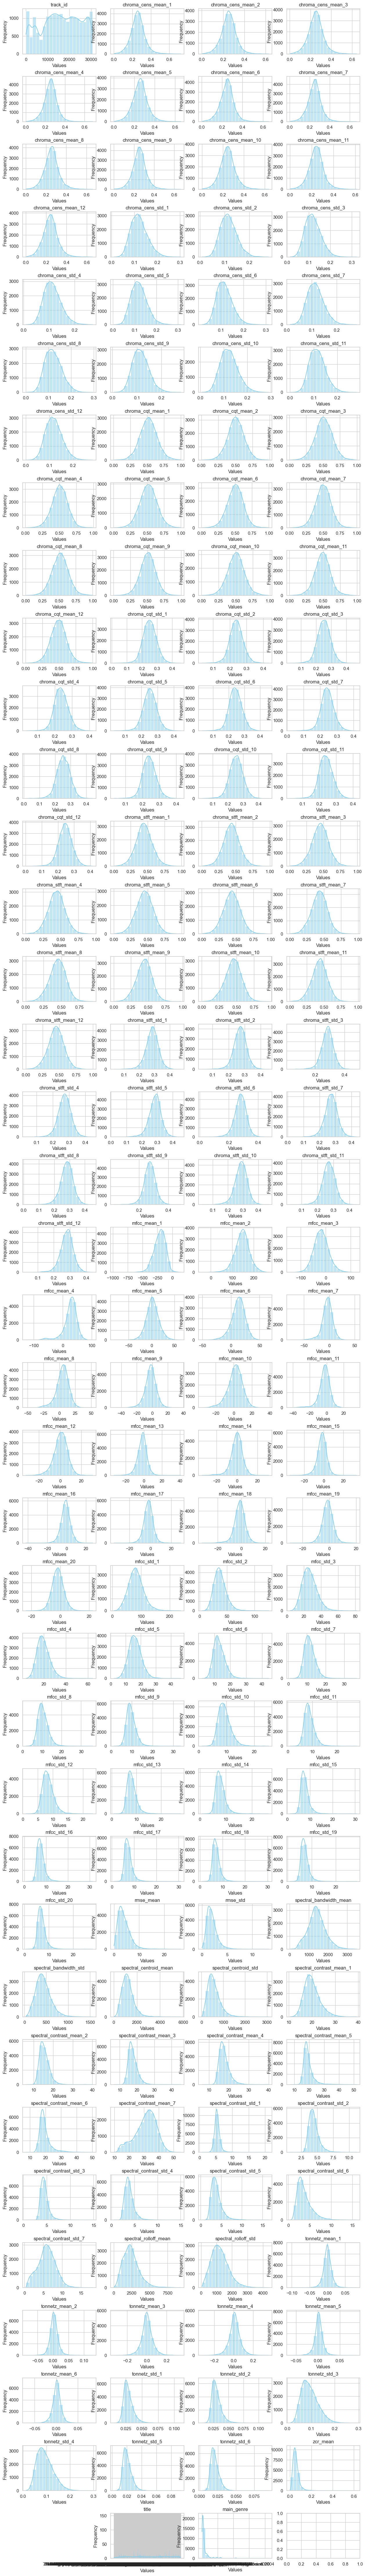

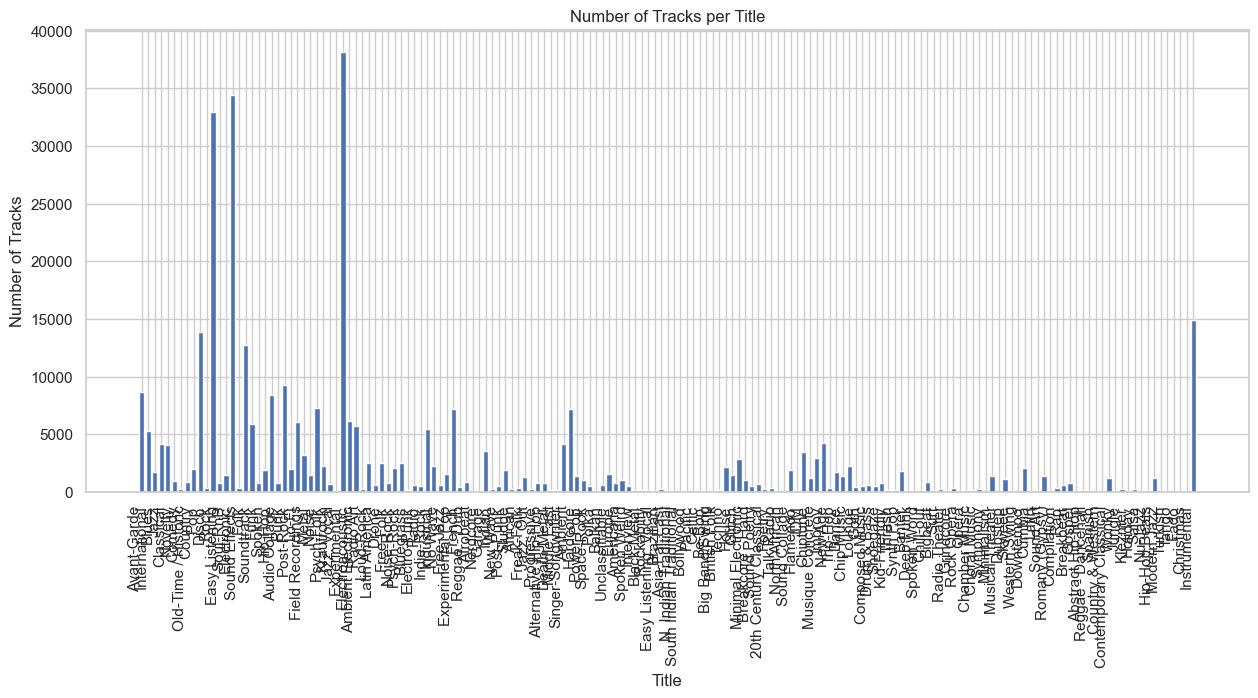

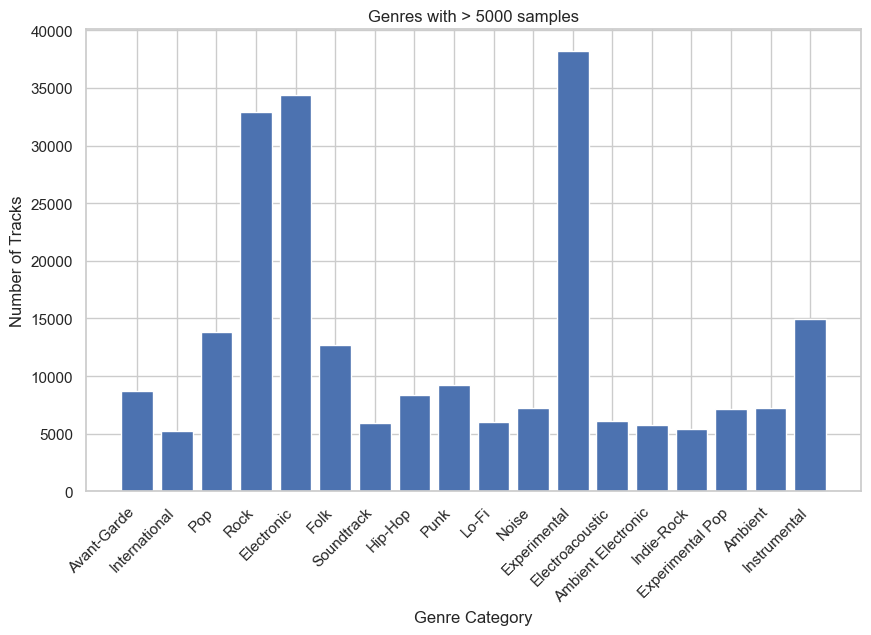

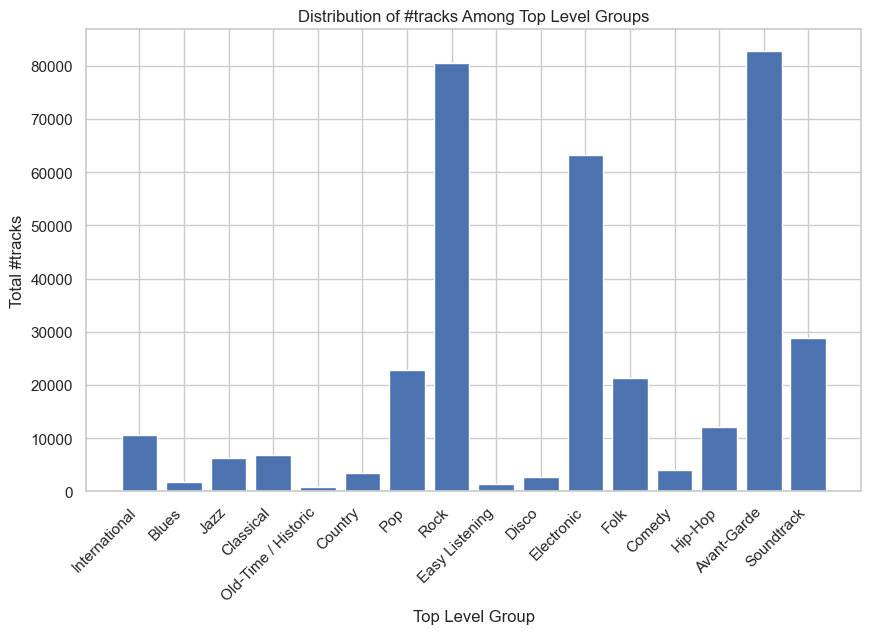

In [101]:
# EDA of Features Data
eda(features)

# EDA of Genre Dataframe
show_genre_distribution(genres)
show_popular_genres(genres)
show_toplevel_genres(genres)

# Preprocessing

In [86]:
full_features = features.copy()

The next three dataframes are engineered by selecting specific variables. 

In [87]:
feature_types = {
    'chroma_cens_mean': range(1, 12),
    'chroma_cens_std': range(1, 12),
    'chroma_cqt_mean': range(1, 12),
    'chroma_cqt_std': range(1, 12),
    'chroma_stft_mean': range(1, 12),
    'chroma_stft_std': range(1, 12),
    'mfcc_mean': range(1, 21),
    'mfcc_std': range(1, 21),
    'tonnetz_mean': range(1, 6),
    'tonnetz_std': range(1, 6),
}

selected_features = select_columns_by_pattern(features, feature_types)

# Add 'track_id' column back to selected features
selected_features['main_genre'] = features['main_genre']
selected_features['track_id'] = features['track_id']

selected_features.shape

(18936, 118)

In [88]:
averaged_features = select_columns_by_pattern(features, feature_types)
averaged_features['main_genre'] = features['main_genre']
averaged_features['track_id'] = features['track_id']

averaged_features.columns

Index(['chroma_cens_mean_1', 'chroma_cens_mean_2', 'chroma_cens_mean_3',
       'chroma_cens_mean_4', 'chroma_cens_mean_5', 'chroma_cens_mean_6',
       'chroma_cens_mean_7', 'chroma_cens_mean_8', 'chroma_cens_mean_9',
       'chroma_cens_mean_10',
       ...
       'tonnetz_mean_3', 'tonnetz_mean_4', 'tonnetz_mean_5', 'tonnetz_std_1',
       'tonnetz_std_2', 'tonnetz_std_3', 'tonnetz_std_4', 'tonnetz_std_5',
       'main_genre', 'track_id'],
      dtype='object', length=118)

In [89]:
# Example usage of chroma_averages function for different feature types
result_chroma_cens_mean = chroma_averages(averaged_features, 'chroma_cens_mean', 12)
result_chroma_cens_std = chroma_averages(averaged_features, 'chroma_cens_std', 12)
result_chroma_cqt_mean = chroma_averages(averaged_features, 'chroma_cqt_mean', 12)
result_chroma_cqt_std = chroma_averages(averaged_features, 'chroma_cqt_std', 12)
result_chroma_stft_mean = chroma_averages(averaged_features, 'chroma_stft_mean', 12)
result_chroma_stft_std = chroma_averages(averaged_features, 'chroma_stft_std', 12)

# Merge the resulting dataframes
merged_result = pd.concat([
    result_chroma_cens_mean, result_chroma_cens_std,
    result_chroma_cqt_mean, result_chroma_cqt_std,
    result_chroma_stft_mean, result_chroma_stft_std
], axis=1)

result_mfcc = create_averaged_mfcc_columns(selected_features)
tonnetz_mean = average_tonnetz_mean_columns(selected_features)
result_tonnetz_std_avg = average_tonnetz_std_columns(selected_features)

# Merge the resulting dataframes
averaged_features = pd.concat([
    result_chroma_cens_mean, result_chroma_cens_std,
    result_chroma_cqt_mean, result_chroma_cqt_std,
    result_chroma_stft_mean, result_chroma_stft_std,
    result_mfcc,  # Include result_mfcc DataFrame
    tonnetz_mean,
    result_tonnetz_std_avg  # Include result_tonnetz_std_avg DataFrame
], axis=1)

averaged_features.shape

(18936, 32)

In [90]:
random_features = random_columns(features)
random_features.shape

(18936, 11)

In [91]:
from sklearn.preprocessing import StandardScaler

# Assuming you have DataFrames named full_features, selected_features, averaged_features, and random_features

# Drop non-numeric columns from DataFrames
full_features_numeric = full_features.select_dtypes(include='number')
selected_features_numeric = selected_features.select_dtypes(include='number')
averaged_features_numeric = averaged_features.select_dtypes(include='number')
random_features_numeric = random_features.select_dtypes(include='number')

# Extract non-numeric columns to handle separately (if needed)
non_numeric_columns = full_features.columns.difference(full_features_numeric.columns)

# Exclude non-numeric columns from scaling
scaler = StandardScaler()

scaled_full_features = scaler.fit_transform(full_features_numeric)
scaled_selected_features = scaler.fit_transform(selected_features_numeric)
scaled_averaged_features = scaler.fit_transform(averaged_features_numeric)
scaled_random_features = scaler.fit_transform(random_features_numeric)

In [92]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'constant' based on your preference

# Impute NaN values in your scaled features
scaled_full_features_imputed = imputer.fit_transform(scaled_full_features)
scaled_selected_features_imputed = imputer.fit_transform(scaled_selected_features)
scaled_averaged_features_imputed = imputer.fit_transform(scaled_averaged_features)
scaled_random_features_imputed = imputer.fit_transform(scaled_random_features)

# Dimension Reduction

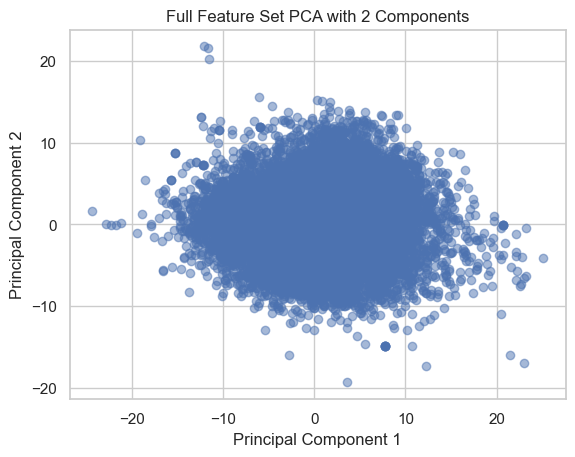

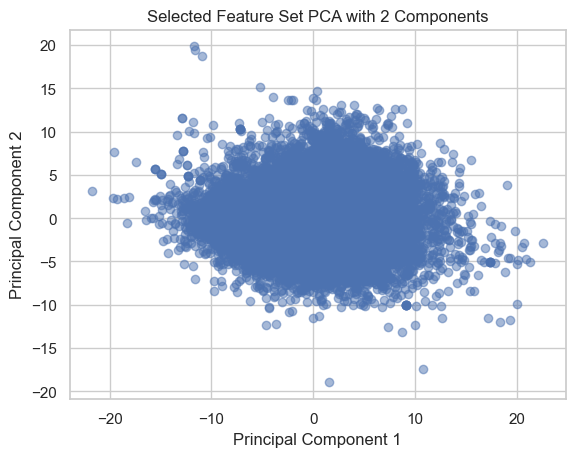

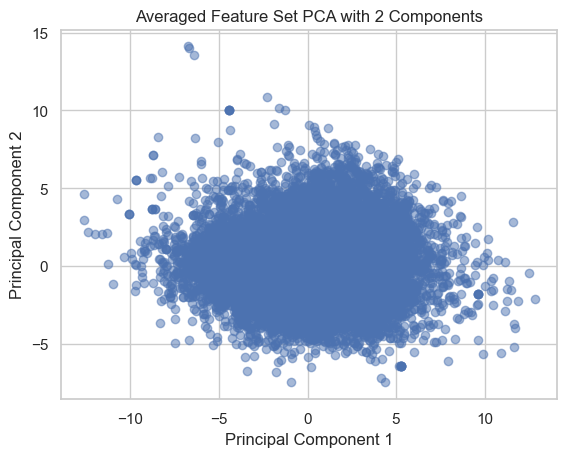

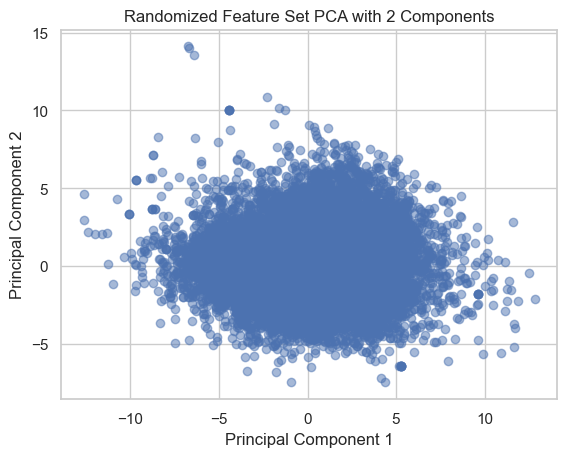

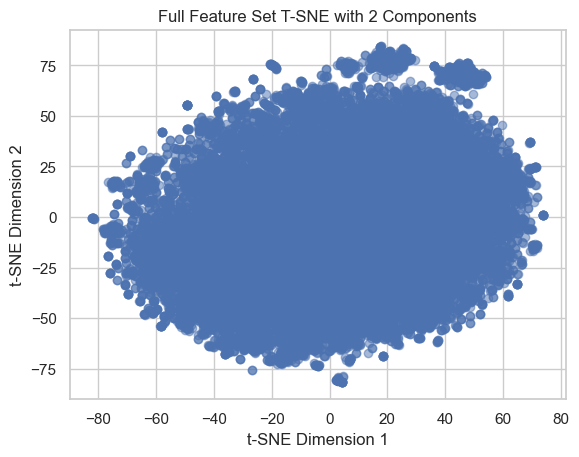

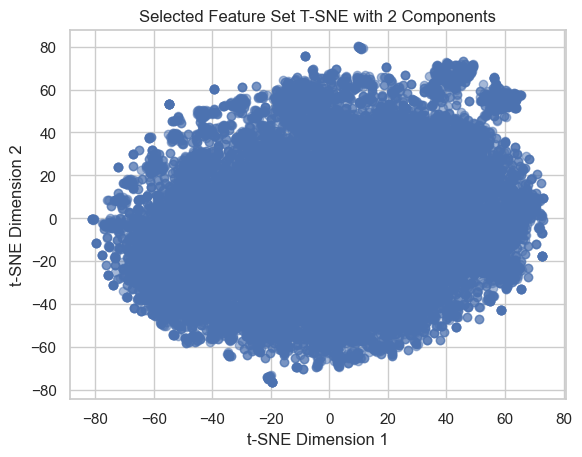

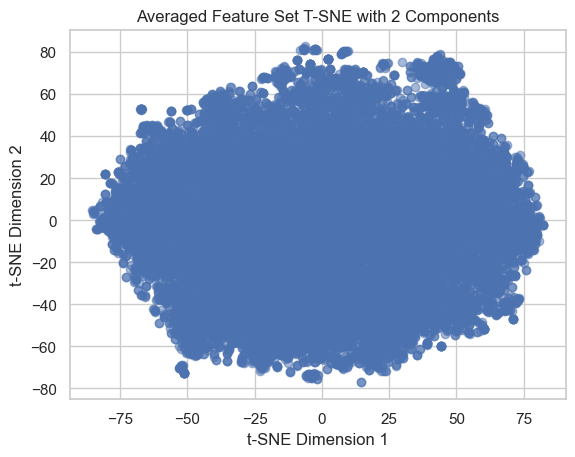

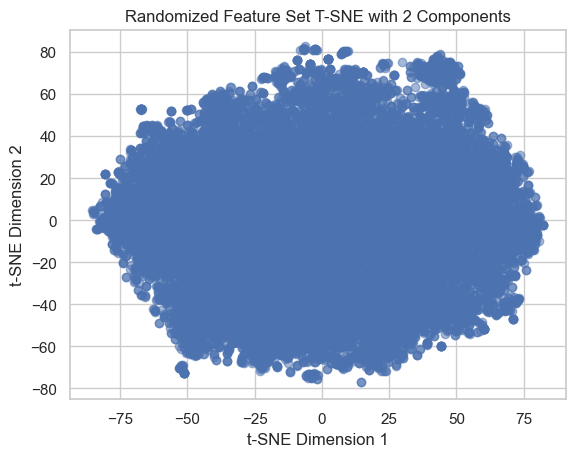

C:\Users\willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


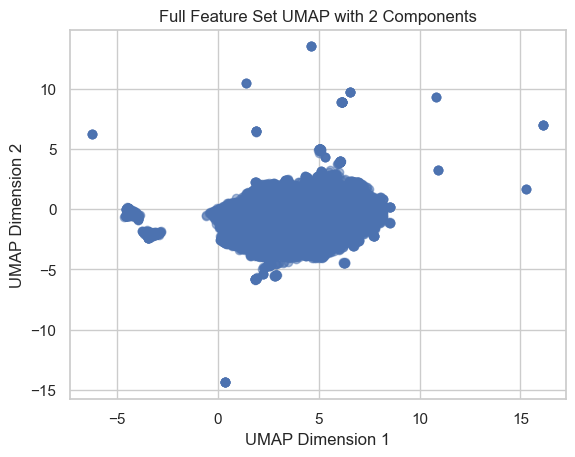

C:\Users\willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


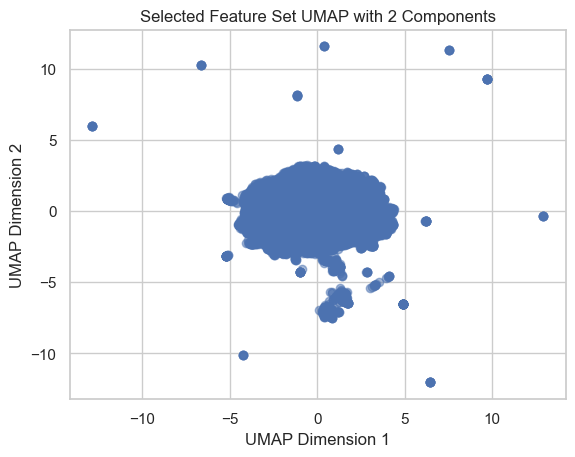

C:\Users\willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


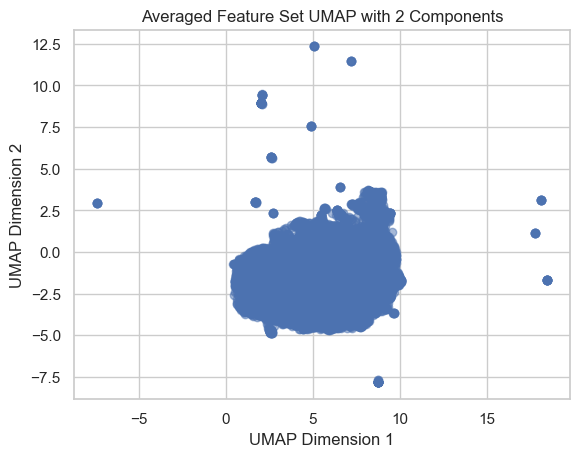

C:\Users\willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


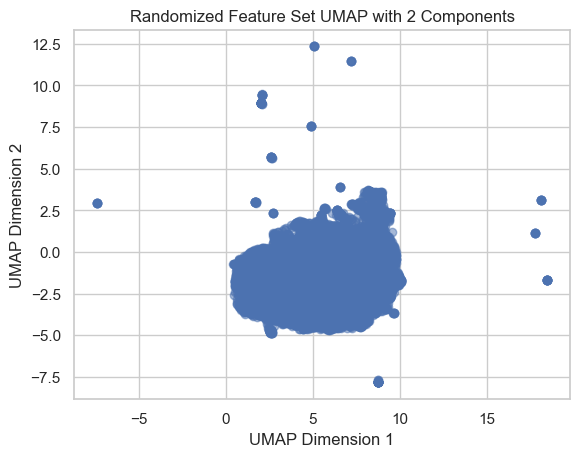

In [95]:
full_pca = apply_visualize_pca(scaled_full_features_imputed, 2, 'Full Feature Set PCA with 2 Components')
selected_pca = apply_visualize_pca(scaled_selected_features_imputed, 2, 'Selected Feature Set PCA with 2 Components')
averaged_pca = apply_visualize_pca(scaled_averaged_features_imputed, 2, 'Averaged Feature Set PCA with 2 Components')
random_pca = apply_visualize_pca(scaled_averaged_features_imputed, 2, 'Randomized Feature Set PCA with 2 Components')

full_tsne = apply_visualize_tsne(scaled_full_features_imputed, 2, 'Full Feature Set T-SNE with 2 Components')
selected_tsne = apply_visualize_tsne(scaled_selected_features_imputed, 2, 'Selected Feature Set T-SNE with 2 Components')
averaged_tsne = apply_visualize_tsne(scaled_averaged_features_imputed, 2, 'Averaged Feature Set T-SNE with 2 Components')
random_tsne = apply_visualize_tsne(scaled_averaged_features_imputed, 2, 'Randomized Feature Set T-SNE with 2 Components')

full_umap = apply_visualize_umap(scaled_full_features_imputed, 2, 'Full Feature Set UMAP with 2 Components')
selected_umap = apply_visualize_umap(scaled_selected_features_imputed, 2, 'Selected Feature Set UMAP with 2 Components')
averaged_umap = apply_visualize_umap(scaled_averaged_features_imputed, 2, 'Averaged Feature Set UMAP with 2 Components')
random_umap = apply_visualize_umap(scaled_averaged_features_imputed, 2, 'Randomized Feature Set UMAP with 2 Components')

# Clustering with KMeans

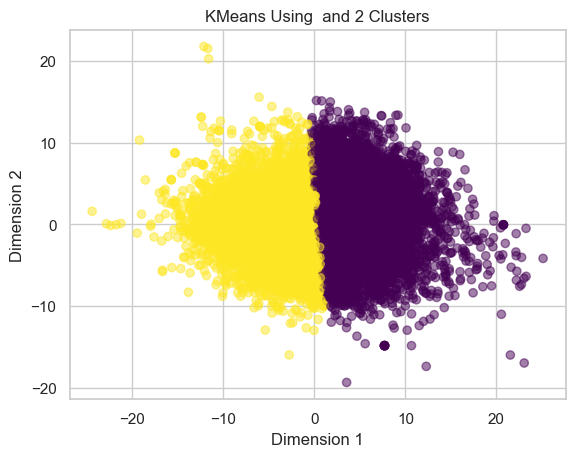

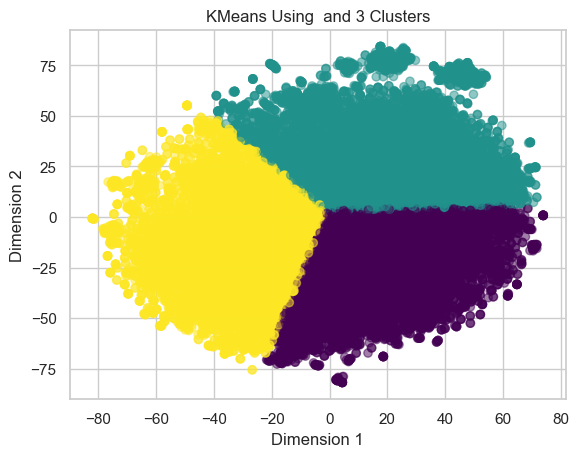

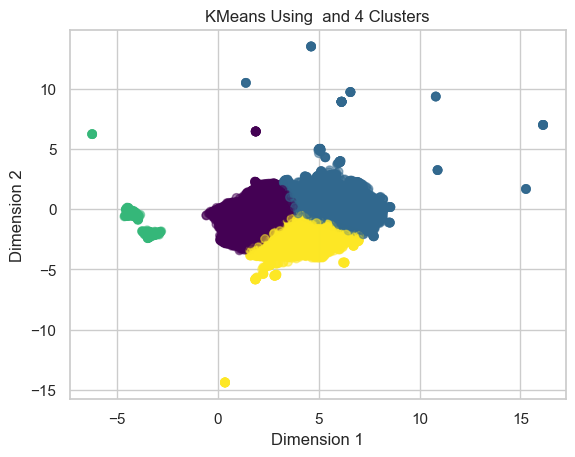

array([3, 3, 3, ..., 0, 0, 0])

In [96]:
# Cluster with Full Features
full_pca_best_clusters, full_pca_best_silhouette_score = silhouette_analysis(full_pca)
apply_visualize_kmeans(full_pca, full_pca_best_clusters)

full_tsne_best_clusters, full_tsne_best_silhouette_score = silhouette_analysis(full_tsne)
apply_visualize_kmeans(full_tsne, full_tsne_best_clusters)

full_umap_best_clusters, full_umap_best_silhouette_score = silhouette_analysis(full_umap)
apply_visualize_kmeans(full_umap, full_umap_best_clusters)

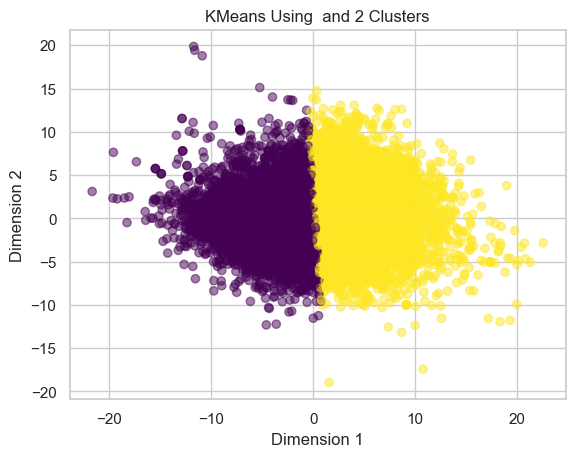

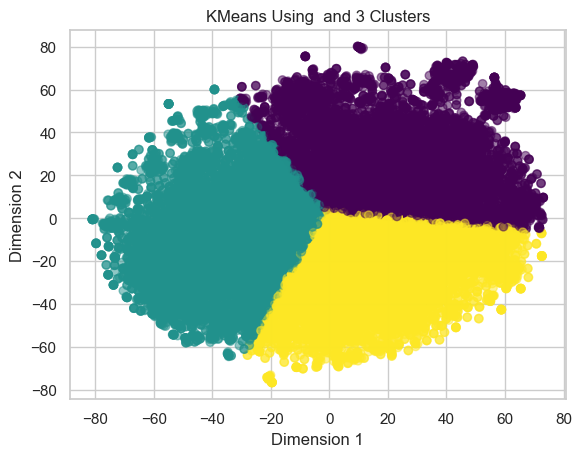

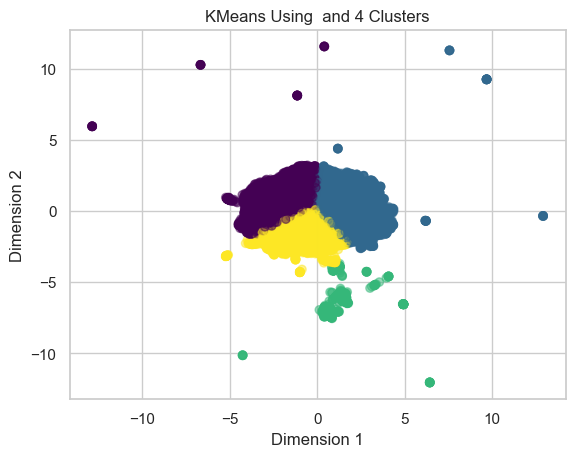

array([3, 3, 3, ..., 0, 0, 0])

In [97]:
# Cluster with Selected Features
selected_pca_best_clusters, selected_pca_best_silhouette_score = silhouette_analysis(selected_pca)
apply_visualize_kmeans(selected_pca, selected_pca_best_clusters)

selected_tsne_best_clusters, selected_tsne_best_silhouette_score = silhouette_analysis(selected_tsne)
apply_visualize_kmeans(selected_tsne, selected_tsne_best_clusters)

selected_umap_best_clusters, selected_umap_best_silhouette_score = silhouette_analysis(selected_umap)
apply_visualize_kmeans(selected_umap, selected_umap_best_clusters)

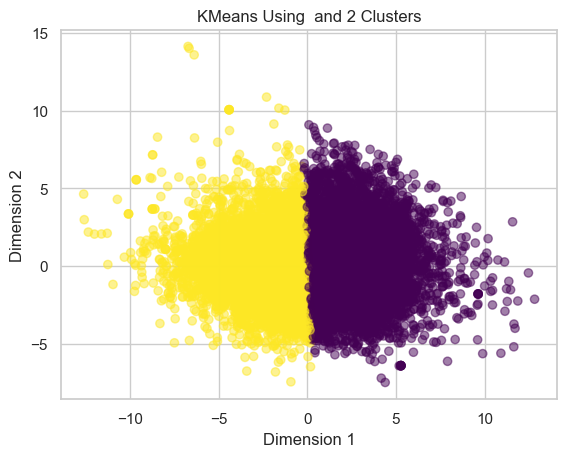

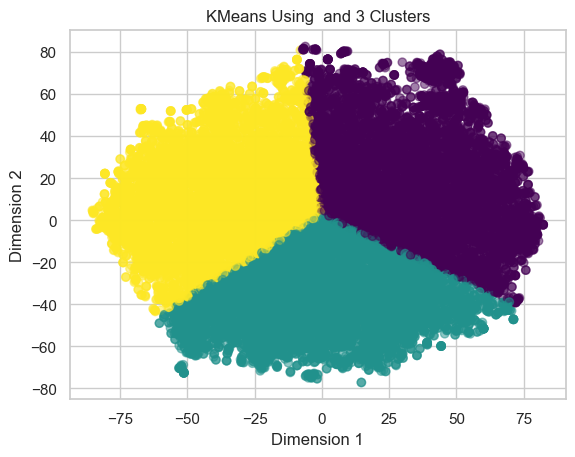

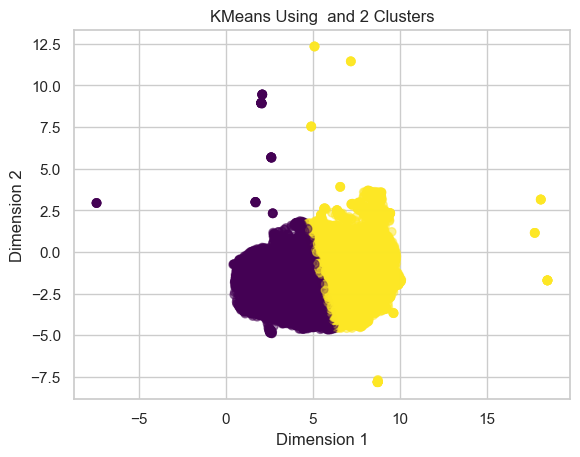

array([0, 0, 0, ..., 1, 0, 1])

In [98]:
# Cluster with Averaged Features
averaged_pca_best_clusters, averaged_pca_best_silhouette_score = silhouette_analysis(averaged_pca)
apply_visualize_kmeans(averaged_pca, averaged_pca_best_clusters)

averaged_tsne_best_clusters, averaged_tsne_best_silhouette_score = silhouette_analysis(averaged_tsne)
apply_visualize_kmeans(averaged_tsne, averaged_tsne_best_clusters)

averaged_umap_best_clusters, averaged_umap_best_silhouette_score = silhouette_analysis(averaged_umap)
apply_visualize_kmeans(averaged_umap, averaged_umap_best_clusters)

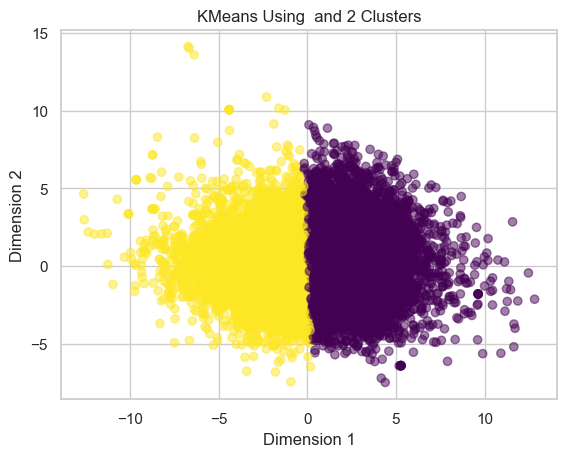

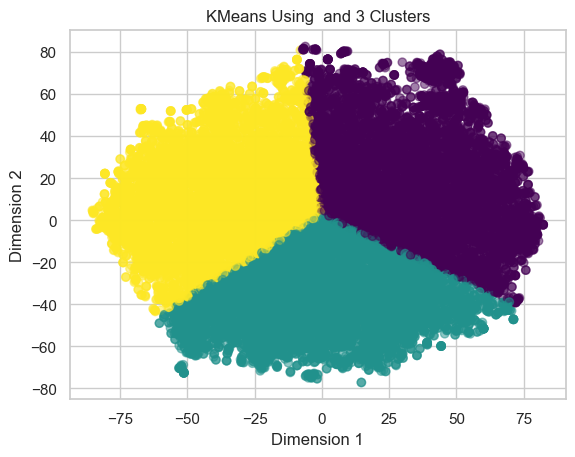

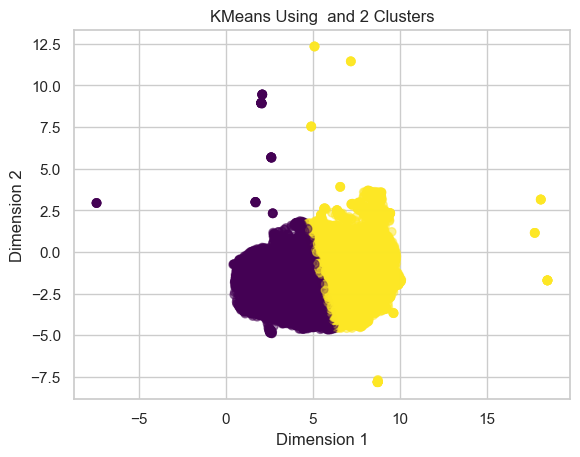

array([0, 0, 0, ..., 1, 0, 1])

In [99]:
# Cluster with Random Features
random_pca_best_clusters, random_pca_best_silhouette_score = silhouette_analysis(random_pca)
apply_visualize_kmeans(random_pca, random_pca_best_clusters)

random_tsne_best_clusters, random_tsne_best_silhouette_score = silhouette_analysis(random_tsne)
apply_visualize_kmeans(random_tsne, random_tsne_best_clusters)

random_umap_best_clusters, random_umap_best_silhouette_score = silhouette_analysis(random_umap)
apply_visualize_kmeans(random_umap, random_umap_best_clusters)

In [100]:
print("Full Features: Best Number of PCA Clusters:", full_pca_best_clusters)
print("Full Features: Best PCA Silhouette Score:", full_pca_best_silhouette_score)

print("Full Features: Best Number TSNE of Clusters:", full_tsne_best_clusters)
print("Full Features: Best TSNE Silhouette Score:", full_tsne_best_silhouette_score)

print("Full Features: Best Number of UMAP Clusters:", full_umap_best_clusters)
print("Full Features: Best UMAP Silhouette Score:", full_umap_best_silhouette_score)

print("Selected Features: Best Number of PCA Clusters:", selected_pca_best_clusters)
print("Selected Features: Best PCA Silhouette Score:", selected_pca_best_silhouette_score)

print("Selected Features: Best Number TSNE of Clusters:", selected_tsne_best_clusters)
print("Selected Features: Best TSNE Silhouette Score:", selected_tsne_best_silhouette_score)

print("Selected Features: Best Number of UMAP Clusters:", selected_umap_best_clusters)
print("Selected Features: Best UMAP Silhouette Score:", selected_umap_best_silhouette_score)

print("Averaged Features: Best Number of PCA Clusters:", averaged_pca_best_clusters)
print("Averaged Features: Best PCA Silhouette Score:", averaged_pca_best_silhouette_score)

print("Averaged Features: Best Number TSNE of Clusters:", averaged_tsne_best_clusters)
print("Averaged Features: Best TSNE Silhouette Score:", averaged_tsne_best_silhouette_score)

print("Averaged Features: Best Number of UMAP Clusters:", averaged_umap_best_clusters)
print("Averaged Features: Best UMAP Silhouette Score:", averaged_umap_best_silhouette_score)

print("Random Features: Best Number of PCA Clusters:", random_pca_best_clusters)
print("Random Features: Best PCA Silhouette Score:", random_pca_best_silhouette_score)

print("Random Features: Best Number TSNE of Clusters:", random_tsne_best_clusters)
print("Random Features: Best TSNE Silhouette Score:", random_tsne_best_silhouette_score)

print("Random Features: Best Number of UMAP Clusters:", random_umap_best_clusters)
print("Random Features: Best UMAP Silhouette Score:", random_umap_best_silhouette_score)

print("\nBest overall Silhouette Score: ", max(full_pca_best_silhouette_score, selected_pca_best_silhouette_score, averaged_pca_best_silhouette_score, random_pca_best_silhouette_score,
                                            full_tsne_best_silhouette_score, selected_tsne_best_silhouette_score, averaged_tsne_best_silhouette_score, random_tsne_best_silhouette_score,
                                            full_umap_best_silhouette_score, selected_umap_best_silhouette_score, averaged_umap_best_silhouette_score, random_umap_best_silhouette_score))

Full Features: Best Number of PCA Clusters: 2
Full Features: Best PCA Silhouette Score: 0.3635185983542901
Full Features: Best Number TSNE of Clusters: 3
Full Features: Best TSNE Silhouette Score: 0.3835318
Full Features: Best Number of UMAP Clusters: 4
Full Features: Best UMAP Silhouette Score: 0.39858994
Selected Features: Best Number of PCA Clusters: 2
Selected Features: Best PCA Silhouette Score: 0.3708432548007638
Selected Features: Best Number TSNE of Clusters: 3
Selected Features: Best TSNE Silhouette Score: 0.38156316
Selected Features: Best Number of UMAP Clusters: 4
Selected Features: Best UMAP Silhouette Score: 0.39345983
Averaged Features: Best Number of PCA Clusters: 2
Averaged Features: Best PCA Silhouette Score: 0.36850749093541063
Averaged Features: Best Number TSNE of Clusters: 3
Averaged Features: Best TSNE Silhouette Score: 0.38003543
Averaged Features: Best Number of UMAP Clusters: 2
Averaged Features: Best UMAP Silhouette Score: 0.42330003
Random Features: Best Num

# Clustering with DBSCan and Grid Search



In [ ]:
# eps_values = [0.1, 0.5, 1.0]
# min_samples_values = [5, 10, 15]

# full_pca_best_params, full_pca_best_score = grid_search_dbscan(full_pca, eps_values, min_samples_values)
# full_tsne_best_params, full_tsne_best_score= grid_search_dbscan(full_tsne, eps_values, min_samples_values)
# full_umap_best_params, full_umap_best_params = grid_search_dbscan(full_umap, eps_values, min_samples_values)

# selected_pca_best_params, selected_pca_best_score = grid_search_dbscan(selected_pca, eps_values, min_samples_values)
# selected_tsne_best_params, selected_tsne_best_score= grid_search_dbscan(selected_tsne, eps_values, min_samples_values)
# selected_umap_best_params, selected_umap_best_params = grid_search_dbscan(selected_umap, eps_values, min_samples_values)

# averaged_pca_best_params, averaged_pca_best_score = grid_search_dbscan(averaged_pca, eps_values, min_samples_values)
# averaged_tsne_best_params, averaged_tsne_best_score= grid_search_dbscan(averaged_tsne, eps_values, min_samples_values)
# averaged_umap_best_params, averaged_umap_best_params = grid_search_dbscan(averaged_umap, eps_values, min_samples_values)

# random_pca_best_params, random_pca_best_score = grid_search_dbscan(random_pca, eps_values, min_samples_values)
# random_tsne_best_params, random_tsne_best_score= grid_search_dbscan(random_tsne, eps_values, min_samples_values)
# random_umap_best_params, random_umap_best_params = grid_search_dbscan(random_umap, eps_values, min_samples_values)

# visualize_dbscan_results(full_pca, full_pca_best_params)
# visualize_dbscan_results(full_tsne, full_tsne_best_params)
# visualize_dbscan_results(full_umap, full_umap_best_params)

# visualize_dbscan_results(selected_pca, selected_pca_best_params)
# visualize_dbscan_results(selected_tsne, selected_tsne_best_params)
# visualize_dbscan_results(selected_umap, selected_umap_best_params)

# visualize_dbscan_results(averaged_pca, averaged_pca_best_params)
# visualize_dbscan_results(averaged_tsne, averaged_tsne_best_params)
# visualize_dbscan_results(averaged_umap, averaged_umap_best_params)

# visualize_dbscan_results(random_pca, random_pca_best_params)
# visualize_dbscan_results(random_tsne, random_tsne_best_params)
# visualize_dbscan_results(random_umap, random_umap_best_params)

In [ ]:
# print("Full Features: Best Number of PCA Clusters:", full_pca_best_clusters)
# print("Full Features: Best PCA Score:", full_pca_best_score)

# print("Full Features: Best Number TSNE of Clusters:", full_tsne_best_clusters)
# print("Full Features: Best TSNE Score:", full_tsne_best_score)

# print("Full Features: Best Number of UMAP Clusters:", full_umap_best_clusters)
# print("Full Features: Best UMAP Score:", full_umap_best_score)

# print("Selected Features: Best Number of PCA Clusters:", selected_pca_best_clusters)
# print("Selected Features: Best PCA Score:", selected_pca_best_score)

# print("Selected Features: Best Number TSNE of Clusters:", selected_tsne_best_clusters)
# print("Selected Features: Best TSNE Score:", selected_tsne_best_score)

# print("Selected Features: Best Number of UMAP Clusters:", selected_umap_best_clusters)
# print("Selected Features: Best UMAP Score:", selected_umap_best_score)

# print("Averaged Features: Best Number of PCA Clusters:", averaged_pca_best_clusters)
# print("Averaged Features: Best PCA Score:", averaged_pca_best_score)

# print("Averaged Features: Best Number TSNE of Clusters:", averaged_tsne_best_clusters)
# print("Averaged Features: Best TSNE Score:", averaged_tsne_best_score)

# print("Averaged Features: Best Number of UMAP Clusters:", averaged_umap_best_clusters)
# print("Averaged Features: Best UMAP Score:", averaged_umap_best_score)

# print("Random Features: Best Number of PCA Clusters:", random_pca_best_clusters)
# print("Random Features: Best PCA Score:", random_pca_best_score)

# print("Random Features: Best Number TSNE of Clusters:", random_tsne_best_clusters)
# print("Random Features: Best TSNE Score:", random_tsne_best_score)

# print("Random Features: Best Number of UMAP Clusters:", random_umap_best_clusters)
# print("Random Features: Best UMAP Score:", random_umap_best_score)

# print("Best overall Score: ", max(full_pca_best_score, selected_pca_best_score, averaged_pca_best_score, random_pca_best_score,
#                                             full_tsne_best_score, selected_tsne_best_score, averaged_tsne_best_score, random_tsne_best_score,
#                                             full_umap_best_score, selected_umap_best_score, averaged_umap_best_score, random_umap_best_score))